In [1]:
# pip install keras_tuner

In [2]:
from pathlib import Path
import os
import keras
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# %pip install scikit-learn
from sklearn.model_selection import train_test_split
from pathlib import Path
# %pip install matplotlib
import matplotlib.pyplot as plt
import glob
import random
from PIL import Image
import numpy as np

# Larger CNN Model
import numpy as np
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from keras.layers import Normalization
from keras.models import Model  # Import Model class
from keras.layers import Input, Dense, Flatten
from keras.optimizers import SGD  # Import optimizer if not already imported
from tensorflow.keras.layers import BatchNormalization
from sklearn import preprocessing
import tensorflow as tf
import keras_tuner as kt
from tensorflow.keras.utils import plot_model

In [3]:
pixel = 37

In [4]:
train_data = tf.keras.preprocessing.image_dataset_from_directory(directory='./Dataset for CA1 part A - AY2425S1/train', 
                                                                 color_mode='grayscale', 
                                                                 batch_size=10000,
                                                                 image_size=(pixel, pixel),
                                                                 seed = 42)

Found 9043 files belonging to 15 classes.


In [5]:
test_data = tf.keras.preprocessing.image_dataset_from_directory(directory='./Dataset for CA1 part A - AY2425S1/test',
                                                                color_mode='grayscale',
                                                                batch_size=10000,
                                                                image_size=(pixel, pixel),
                                                                seed = 42)

Found 3000 files belonging to 15 classes.


In [6]:
valdation_data = tf.keras.preprocessing.image_dataset_from_directory(directory='./Dataset for CA1 part A - AY2425S1/validation',
                                                                        color_mode='grayscale',
                                                                        batch_size=10000,
                                                                        image_size=(pixel, pixel),
                                                                        seed = 42)

Found 3000 files belonging to 15 classes.


In [7]:
for image, label in train_data:
    X_train = image
    y_train = label

X_train = X_train/255
y_train = to_categorical(y_train,15)

In [8]:
for image, label in test_data:
    X_test = image
    y_test = label

X_test = X_test/255
y_test = to_categorical(y_test,15)

In [9]:
for image, label in valdation_data:
    X_validate = image
    y_validate = label

X_validate = X_validate/255
y_validate = to_categorical(y_validate,15)

In [10]:
print(X_validate.shape)
print(X_test.shape)
print(X_train.shape)    
print(y_train.shape)

(3000, 37, 37, 1)
(3000, 37, 37, 1)
(9043, 37, 37, 1)
(9043, 15)


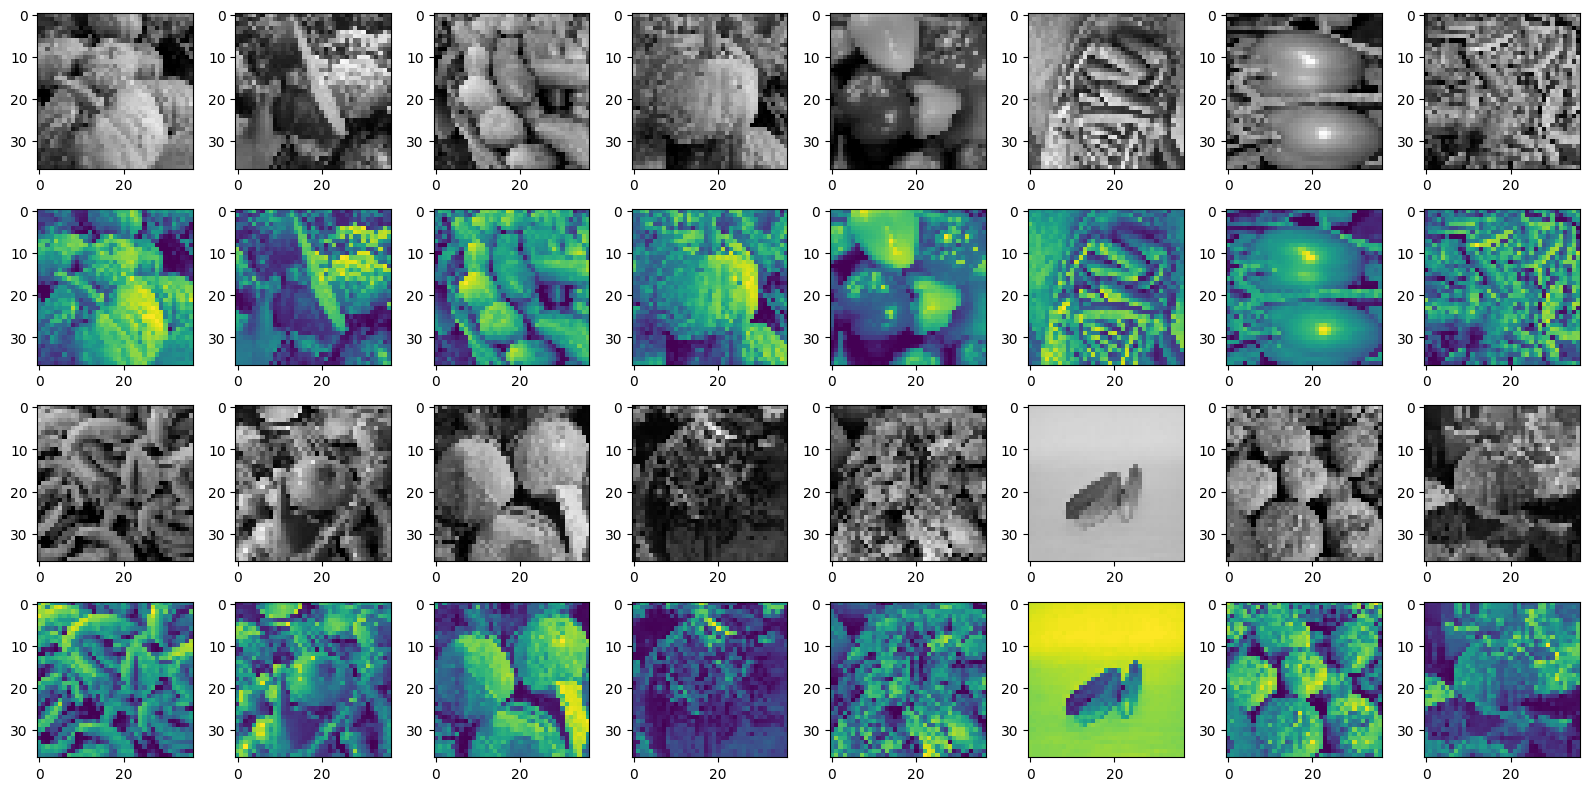

In [11]:
rows = 2 # defining number of rows in figure
cols = 8 # defining number of colums in figure

f = plt.figure(figsize=(2*cols,2*rows*2))

for i in range(rows):
    for j in range(cols):
        f.add_subplot(rows*2,cols,(2*i*cols)+(j+1))
        plt.imshow(tf.image.grayscale_to_rgb(X_train[i*cols + j]))
        plt.axis("on")

    for j in range(cols):
        f.add_subplot(rows*2,cols,((2*i+1)*cols) +(j+1))
        plt.imshow(X_train[i*cols + j])
        plt.axis("on")

plt.tight_layout()
plt.show()

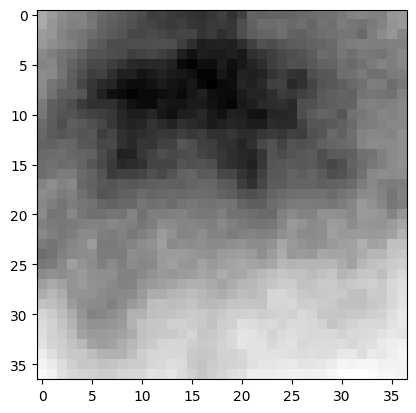

In [12]:
plt.imshow(np.mean(X_train, axis=0), cmap='Greys')
plt.show()

<Axes: >

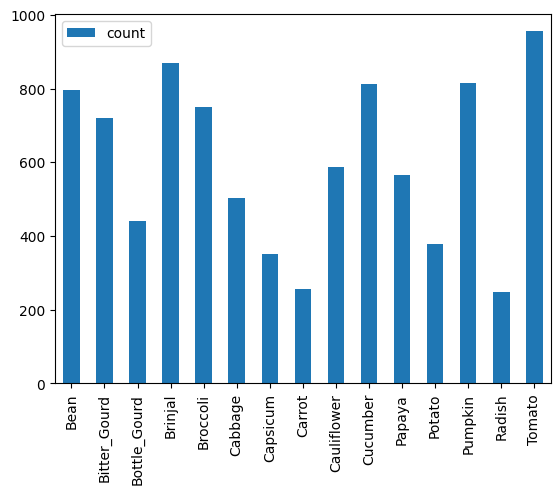

In [13]:
import pandas as pd
images_length={}
for i, cat in enumerate(os.listdir('./Dataset for CA1 part A - AY2425S1/train')):
        
        # Load images for the ith category
        image_path = "./Dataset for CA1 part A - AY2425S1/train" + '/' + cat
        images_in_folder = os.listdir(image_path)
        images_length[cat]=len(images_in_folder)
        
pd.DataFrame(images_length,index = ['count']).T.plot(kind='bar')

<h1>Utility Functions / Variable</h1>
<br>
<h3>Learning Curve Plotting Function</h3>

In [14]:
def plot_loss_curve(history):
    history = pd.DataFrame(history)
    epochs = list(range(1, len(history) + 1))
    fig, ax = plt.subplots(1, 1, figsize=(12, 6))
    plt.title("Plot Loss Curve")
    plt.scatter(epochs, history["loss"])
    plt.plot(epochs, history["loss"], label="Training Loss")
    plt.scatter(epochs, history["val_loss"])
    plt.plot(epochs, history["val_loss"], label="Validation Loss")
    plt.scatter(epochs, history["accuracy"])
    plt.plot(epochs, history["accuracy"], label="Training Accuracy")
    plt.scatter(epochs, history["val_accuracy"])
    plt.plot(epochs, history["val_accuracy"], label="Validation Accuracy")
    plt.ylabel("Accuracy")
    plt.xlabel("Epochs")
    plt.legend()

<h3>Model Results</h3>

In [15]:
# Initialize an empty DataFrame
Model_Results = pd.DataFrame()

# Assuming baseModelHistory is a dictionary with history data
def Update_Models(History,Name,Batch_size):
    global Model_Results
    History = History.history

    print(History)
    
    # Find the index of the best validation accuracy
    best_val_idx = np.argmax(History["val_accuracy"])

    # Result dictionary for the best epoch
    result = {
        'Model Name': Name,
        'epoch': len(History["loss"]),
        'Batch Size': Batch_size,
        'best_val_accuracy': History["val_accuracy"][best_val_idx],
        'best_val_loss': History["val_loss"][best_val_idx],
        'accuracy': History["accuracy"][best_val_idx],
        'loss': History["loss"][best_val_idx]
    }

    # Convert the result dictionary to a DataFrame and append it
    result_df = pd.DataFrame([result])
    Model_Results = pd.concat([Model_Results, result_df], ignore_index=True)

In [16]:
size = 64

<h1>BaseLine Model</h1>

In [17]:
num_classes = y_test.shape[1]

In [18]:
# create model
BaseLinemodel = Sequential()
BaseLinemodel.add(Dense(128, input_shape=(37,37,1), activation='relu'))
BaseLinemodel.add(Flatten())
BaseLinemodel.add(Dense(64, activation='relu'))
BaseLinemodel.add(Dense(32, activation='relu'))
BaseLinemodel.add(Dense(num_classes, activation='sigmoid'))

# Compile model
BaseLinemodel.compile(loss='binary_crossentropy', optimizer='adam', 
 metrics=['accuracy'])

BaseLinemodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 37, 37, 128)       256       
                                                                 
 flatten (Flatten)           (None, 175232)            0         
                                                                 
 dense_1 (Dense)             (None, 64)                11214912  
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 15)                495       
                                                                 
Total params: 11,217,743
Trainable params: 11,217,743
Non-trainable params: 0
_________________________________________________________________


In [19]:
# Fit the model
baseModelHistory = BaseLinemodel.fit(X_train, y_train, validation_data=(X_validate, y_validate), epochs=100, batch_size=32, verbose=1, callbacks=EarlyStopping(monitor='val_loss', patience=15))

# Final evaluation of the model
scores = BaseLinemodel.evaluate(X_test, y_test)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/100
283/283 [==============================] - 5s 12ms/step - loss: 0.2620 - accuracy: 0.1393 - val_loss: 0.2495 - val_accuracy: 0.1293
Epoch 2/100
283/283 [==============================] - 3s 11ms/step - loss: 0.2269 - accuracy: 0.2269 - val_loss: 0.2294 - val_accuracy: 0.2163
Epoch 3/100
283/283 [==============================] - 3s 11ms/step - loss: 0.2121 - accuracy: 0.2996 - val_loss: 0.2180 - val_accuracy: 0.2757
Epoch 4/100
283/283 [==============================] - 3s 11ms/step - loss: 0.2027 - accuracy: 0.3471 - val_loss: 0.2119 - val_accuracy: 0.3010
Epoch 5/100
283/283 [==============================] - 3s 11ms/step - loss: 0.1949 - accuracy: 0.3787 - val_loss: 0.2042 - val_accuracy: 0.3257
Epoch 6/100
283/283 [==============================] - 3s 11ms/step - loss: 0.1865 - accuracy: 0.4093 - val_loss: 0.2095 - val_accuracy: 0.3110
Epoch 7/100
283/283 [==============================] - 3s 11ms/step - loss: 0.1812 - accuracy: 0.4306 - val_loss: 0.1939 - val_accuracy:

In [20]:
Update_Models(baseModelHistory,'BaseLine',32)

{'loss': [0.2620373070240021, 0.22692276537418365, 0.21211183071136475, 0.2026507705450058, 0.19491834938526154, 0.18647094070911407, 0.1812419891357422, 0.17443840205669403, 0.16858869791030884, 0.16497591137886047, 0.15729959309101105, 0.1533820927143097, 0.1489860564470291, 0.1456555724143982, 0.14133957028388977, 0.13920100033283234, 0.13562162220478058, 0.13306015729904175, 0.12884551286697388, 0.12548476457595825, 0.12348520755767822, 0.11994629353284836, 0.11805850267410278, 0.11508796364068985, 0.11193227022886276, 0.10988544672727585, 0.10932525992393494, 0.10611727833747864, 0.10536156594753265], 'accuracy': [0.1393342912197113, 0.2269158512353897, 0.29956871271133423, 0.3471193313598633, 0.37874600291252136, 0.4092668294906616, 0.4306093156337738, 0.4548269510269165, 0.4774964153766632, 0.48656418919563293, 0.5248258113861084, 0.5284750461578369, 0.556120753288269, 0.5685060024261475, 0.5801172256469727, 0.5909543037414551, 0.6047771573066711, 0.613181471824646, 0.6263408064

In [21]:
Model_Results

,Model Name,epoch,Batch Size,best_val_accuracy,best_val_loss,accuracy,loss
0,BaseLine,29,32,0.484,0.192453,0.711821,0.105362


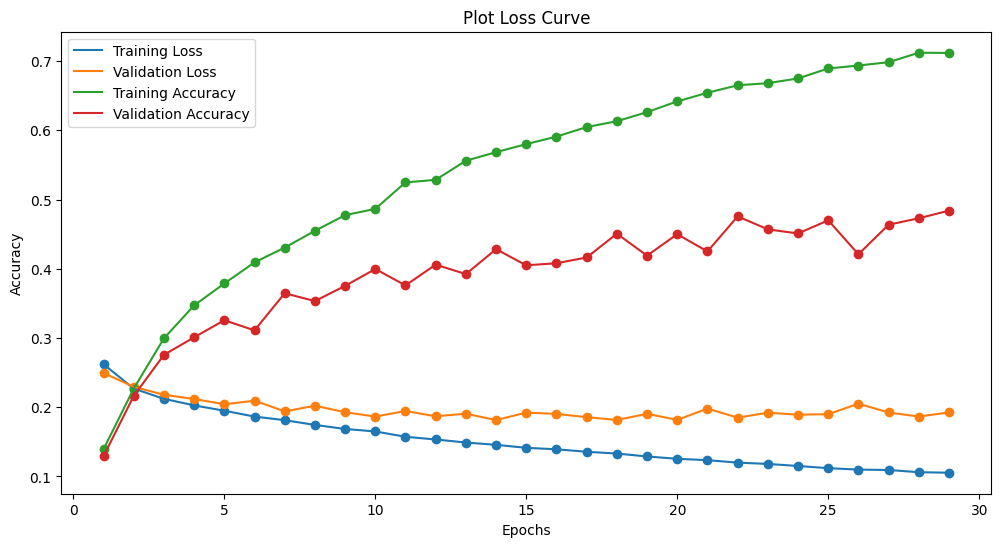

In [22]:
plot_loss_curve(baseModelHistory.history)

<H1>Data Augmentation</H1>

In [23]:
IMG_SIZE = (37, 37, 1)

In [24]:
def data_augmentation(x_train):
    imageArr = []
    for images in x_train:
        images = images.reshape(37, 37, 1)
        image = tf.image.random_flip_left_right(images)
        image = tf.image.resize_with_crop_or_pad(
            image, IMG_SIZE[0] + 4, IMG_SIZE[1])
        image = tf.image.random_crop(
            image, size=IMG_SIZE
        )
        imageArr.append(tf.reshape(image, (37, 37)))
    return np.array(imageArr)

In [25]:
X_train_aug = np.copy(X_train)

In [26]:
X_train_aug = data_augmentation(X_train_aug)

In [27]:
X_train_aug.shape

(9043, 37, 37)

In [28]:
print(X_train_aug.shape)

(9043, 37, 37)


In [29]:
class_labels = {0: 'Bean', 1: 'Bitter_Gourd', 2: 'Bottle_Gourd', 3: 'Brinjal', 4: 'Broccoli', 5: 'Cabbage', 6: 'Capsicum', 7: 'Carrot', 8: 'Cauliflower', 9: 'Cucumber', 10: 'Papaya', 11: 'Potato', 12: 'Pumpkin', 13: 'Radish', 14: 'Tomato'}

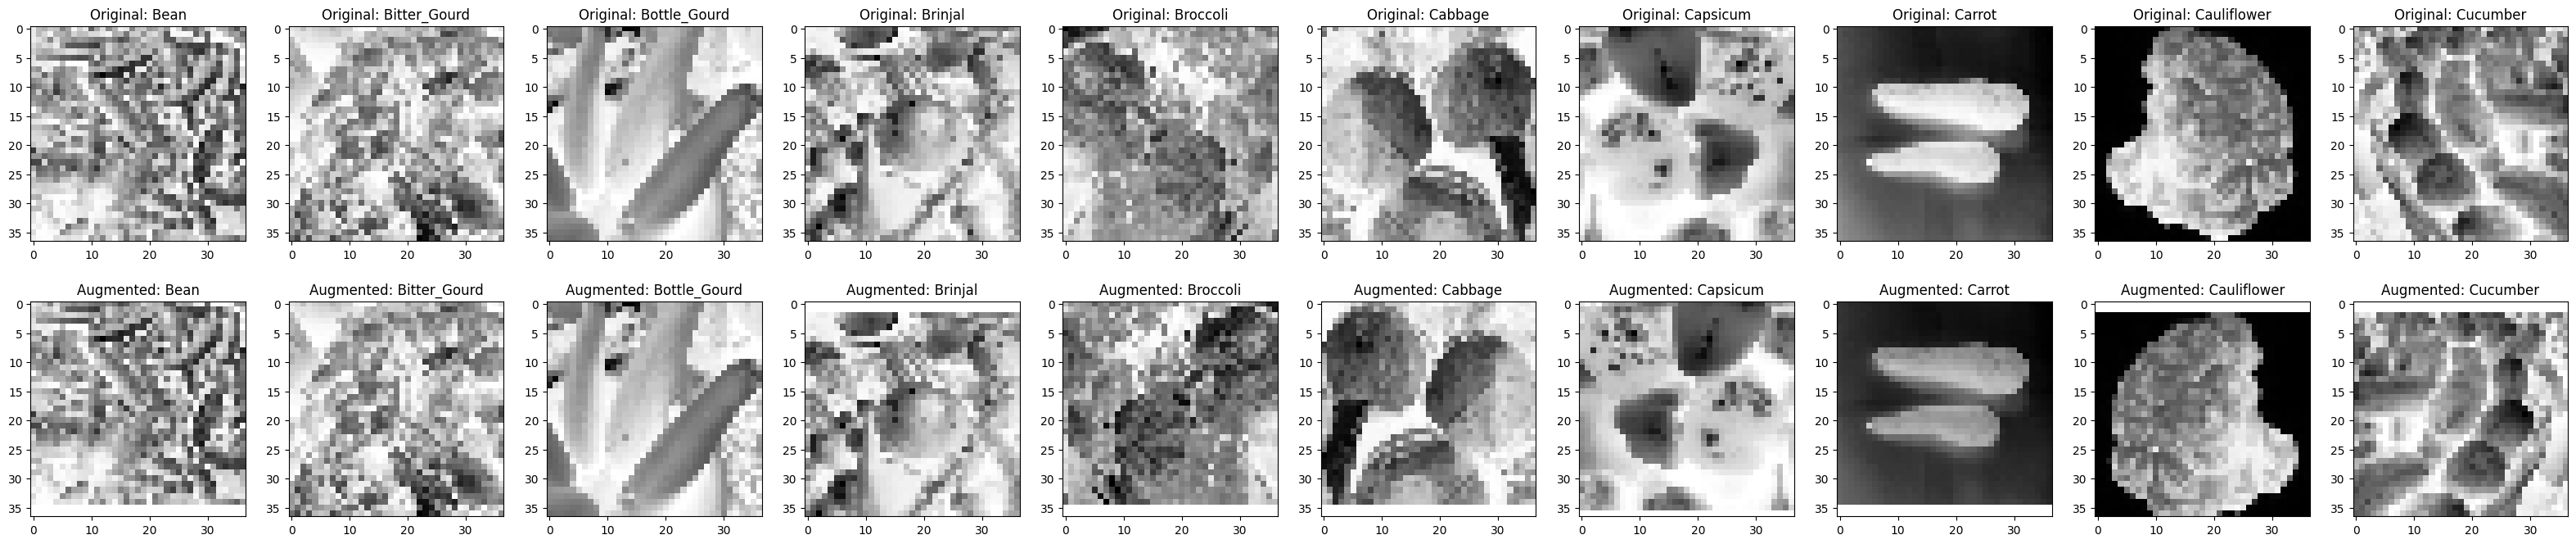

In [30]:
fig, ax = plt.subplots(2, 10, figsize=(40, 8))
for idx in range(20):
    subplot = ax.ravel()[idx]
    y_label = np.argmax(y_train, axis=1)
    if idx >= 10:
        subplot.set_title(f"Augmented: {class_labels[idx % 10]}")
        subplot.imshow(X_train_aug[y_label == idx % 10][0], cmap='Greys')
    else:
        subplot.set_title(f"Original: {class_labels[idx % 10]}")
        subplot.imshow(X_train[y_label == idx % 10][0], cmap='Greys')
    subplot.axis("on")
plt.show()

<h2>Conv2D Model</h2>

<hr>
Without Augmented Data

Ref : https://www.geeksforgeeks.org/keras-conv2d-class/


<ol>
<li>kernel_size : This parameter determines the dimensions of the kernel. Common dimensions include 1×1, 3×3, 5×5, and 7×7 which can be passed as (1, 1), (3, 3), (5, 5), or (7, 7) tuples.
It is an integer or tuple/list of 2 integers, specifying the height and width of the 2D convolution window.
This parameter must be an odd integer.</li>
</ol>

In [81]:
def conv2D_Model(x_train,loss_type,activation_type,Batch_size):
    conv2D = Sequential()

    conv2D.add(Conv2D(32,(5,5), padding="same", activation='relu',input_shape = X_train.shape[1:]))
    conv2D.add(MaxPooling2D(pool_size=(2,2)))

    conv2D.add(Conv2D(64,(3, 3), activation=activation_type))
    conv2D.add(MaxPooling2D(pool_size=(2, 2)))

    conv2D.add(Conv2D(128,(3, 3), activation=activation_type))
    conv2D.add(MaxPooling2D(pool_size=(2, 2)))

    conv2D.add(Dropout(0.4))
    conv2D.add(Flatten())

    conv2D.add(BatchNormalization())
    
    conv2D.add(Dense(256, activation = activation_type)) 
    conv2D.add(Dense(128, activation = activation_type)) 
    conv2D.add(Dense(84, activation = activation_type)) 
    conv2D.add(Dense(64, activation = activation_type)) 

    conv2D.add(Dense(num_classes, activation ='softmax')) 

    conv2D.compile(loss=loss_type,
                optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
                metrics=['accuracy'])

    # mon_val_acc = EarlyStopping(monitor='val_accuracy', patience=15)
    mon_val_loss = EarlyStopping(monitor='val_loss', patience=15)

    train_history = conv2D.fit(x_train, y_train, validation_data=(X_validate, y_validate), epochs=100, batch_size=Batch_size, verbose=1, callbacks = mon_val_loss)

    # Final evaluation of the model
    scores = conv2D.evaluate(X_test, y_test)
    print("CNN Error: %.2f%%" % (100 - scores[1] * 100))

    plot_loss_curve(train_history.history)

    # plot_model(conv2D)

    return train_history,loss_type,activation_type

Epoch 1/100
91/91 [==============================] - 2s 14ms/step - loss: 2.6940 - accuracy: 0.1101 - val_loss: 2.7066 - val_accuracy: 0.0727
Epoch 2/100
91/91 [==============================] - 1s 11ms/step - loss: 2.6213 - accuracy: 0.1449 - val_loss: 2.7023 - val_accuracy: 0.0900
Epoch 3/100
91/91 [==============================] - 1s 11ms/step - loss: 2.5462 - accuracy: 0.1618 - val_loss: 2.6739 - val_accuracy: 0.1460
Epoch 4/100
91/91 [==============================] - 1s 11ms/step - loss: 2.4589 - accuracy: 0.1935 - val_loss: 2.6219 - val_accuracy: 0.1620
Epoch 5/100
91/91 [==============================] - 1s 11ms/step - loss: 2.3788 - accuracy: 0.2363 - val_loss: 2.5579 - val_accuracy: 0.1713
Epoch 6/100
91/91 [==============================] - 1s 11ms/step - loss: 2.2857 - accuracy: 0.2692 - val_loss: 2.4356 - val_accuracy: 0.2297
Epoch 7/100
91/91 [==============================] - 1s 11ms/step - loss: 2.1976 - accuracy: 0.2984 - val_loss: 2.5944 - val_accuracy: 0.1987
Epoch 

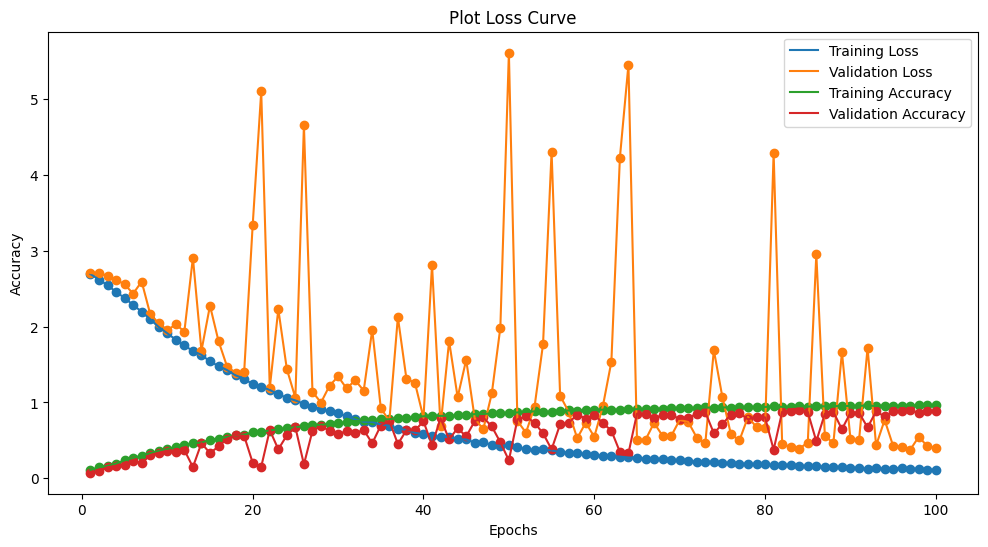

In [82]:
from tensorflow.keras.layers import AveragePooling2D

histories = []
loss = [tf.keras.losses.categorical_crossentropy]
activation = ['relu']
for i in loss:
    for x in activation:
        Model_Hist,Loss,Activation = conv2D_Model(X_train,i,x,100)
        histories.append((Model_Hist,Loss,Activation))
        Update_Models(Model_Hist,f'Con2D + {x}',100)

In [ ]:
# for history_info in histories:
#     print(f'Activation: {history_info[2]} \nLoss: {str(history_info[1])}\n')
#     print(history_info[0].history)
#     print("-" * 225)

In [83]:
# Model_Results

With Augmented Data

Epoch 1/100
91/91 [==============================] - 2s 13ms/step - loss: 2.6748 - accuracy: 0.0877 - val_loss: 2.7057 - val_accuracy: 0.0677
Epoch 2/100
91/91 [==============================] - 1s 12ms/step - loss: 2.6267 - accuracy: 0.1156 - val_loss: 2.7002 - val_accuracy: 0.0883
Epoch 3/100
91/91 [==============================] - 1s 12ms/step - loss: 2.5845 - accuracy: 0.1417 - val_loss: 2.6999 - val_accuracy: 0.1230
Epoch 4/100
91/91 [==============================] - 1s 12ms/step - loss: 2.5348 - accuracy: 0.1787 - val_loss: 2.6681 - val_accuracy: 0.1490
Epoch 5/100
91/91 [==============================] - 1s 12ms/step - loss: 2.4795 - accuracy: 0.2096 - val_loss: 2.6265 - val_accuracy: 0.1850
Epoch 6/100
91/91 [==============================] - 1s 12ms/step - loss: 2.3964 - accuracy: 0.2413 - val_loss: 2.6142 - val_accuracy: 0.1137
Epoch 7/100
91/91 [==============================] - 1s 12ms/step - loss: 2.3020 - accuracy: 0.2642 - val_loss: 2.4513 - val_accuracy: 0.1883
Epoch 

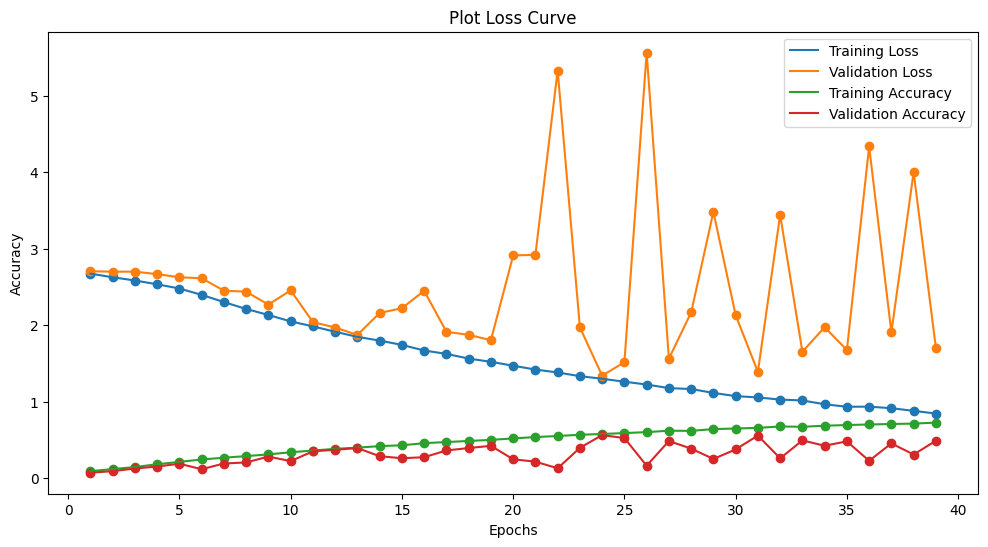

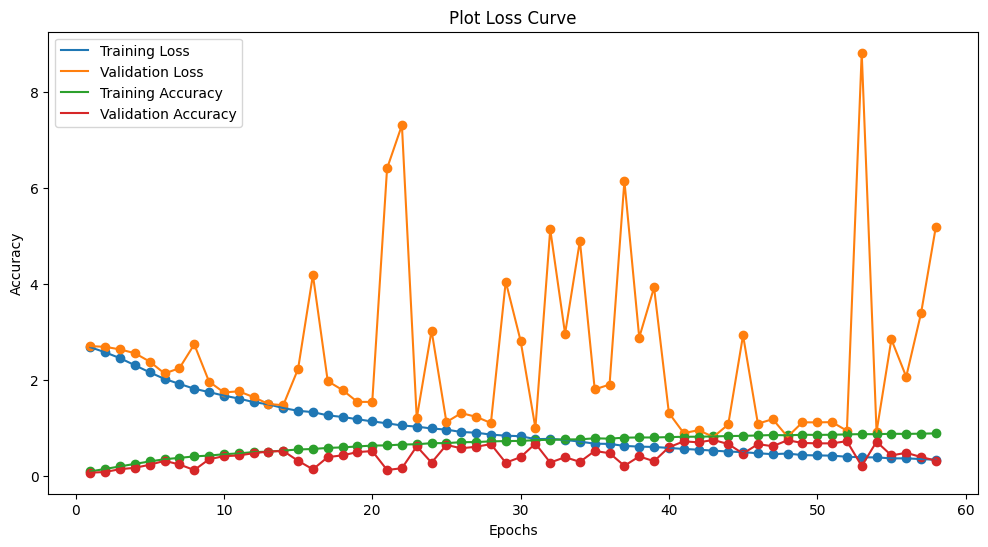

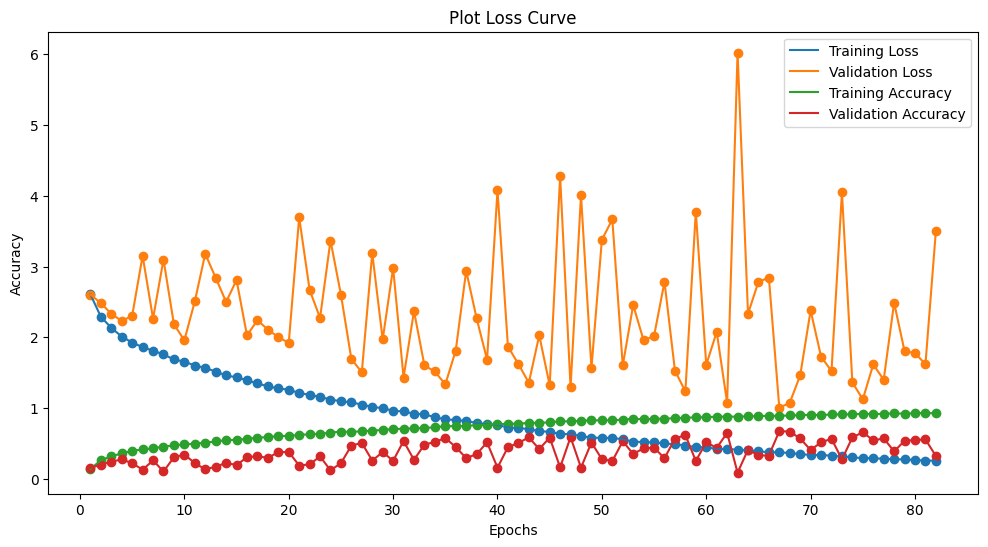

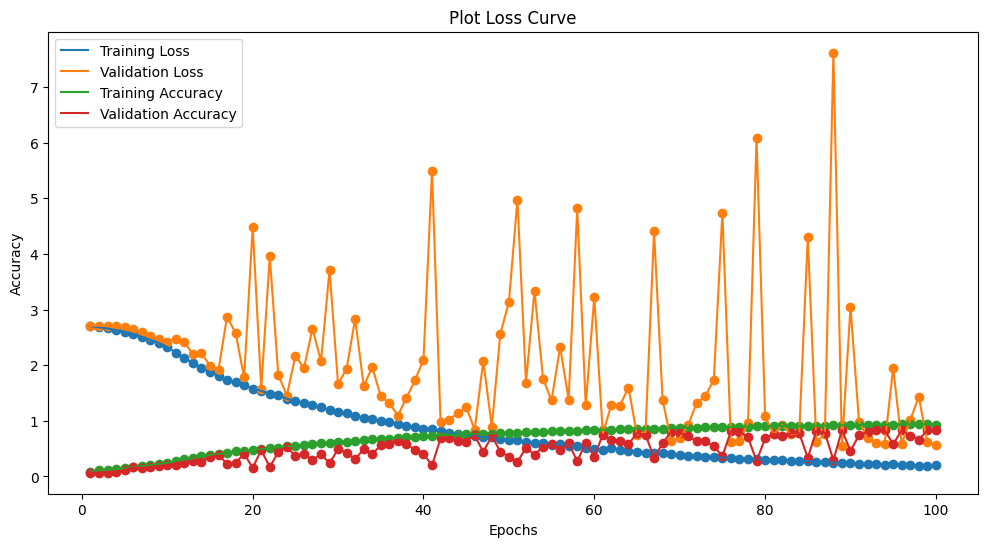

In [84]:
loss = [tf.keras.losses.categorical_crossentropy]
activation = ['relu','leaky_relu','tanh','gelu']
for i in loss:
    for x in activation:
        Model_Hist,Loss,Activation = conv2D_Model(X_train_aug,i,x,100)
        histories.append((Model_Hist,Loss,Activation))
        Update_Models(Model_Hist,f'Con2D + {x} (Augmented Data)',100)

In [85]:
Model_Results

,Model Name,epoch,Batch Size,best_val_accuracy,best_val_loss,accuracy,loss
0,BaseLine,29,32,0.484000,0.192453,0.711821,0.105362
1,Con2D + relu (Batch Size : 64),57,64,0.871000,0.505980,0.991485,0.040913
2,Con2D + leaky_relu (Batch Size : 64),63,64,0.859000,0.595740,0.994581,0.030996
3,Con2D + tanh (Batch Size : 64),66,64,0.825333,0.591096,0.994692,0.056825
4,Con2D + gelu (Batch Size : 64),56,64,0.866333,0.587263,0.992480,0.036179
5,Con2D + relu (Augmented Data),50,64,0.786000,0.721980,0.963508,0.150230
6,Con2D + leaky_relu (Augmented Data),50,64,0.773000,0.854321,0.984850,0.071391
7,Con2D + tanh (Augmented Data),73,64,0.739333,0.881995,0.995466,0.063801
8,Con2D + gelu (Augmented Data),50,64,0.770333,0.892085,0.990269,0.057355
9,Con2D + relu,100,64,0.820000,0.601988,0.833352,0.506653


In [ ]:
def build_model(hp):
    # create model object
    model = keras.Sequential([
    #adding first convolutional layer    
    keras.layers.Conv2D(
        #adding filter 
        filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),
        # adding filter size or kernel size
        kernel_size=hp.Choice('conv_1_kernel', values = [3,5]),
        #activation function
        activation='gelu',
        input_shape=(37,37,1)),
    # adding second convolutional layer 
    keras.layers.Conv2D(
        #adding filter 
        filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
        #adding filter size or kernel size
        kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
        #activation function
        activation='gelu'
    ),
    # adding flatten layer    
    keras.layers.Flatten(),
    # adding dense layer    
    keras.layers.Dense(
        units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),
        activation='relu'
    ),
    # output layer    
    keras.layers.Dense(num_classes, activation ='softmax')
    ])
    #compilation of model
    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
    return model

In [ ]:
# #importing random search
# from kerastuner import RandomSearch
# #creating randomsearch object
# tuner = RandomSearch(build_model,
#                     objective='val_accuracy',
#                     max_trials = 5)
# # search best parameter
# tuner.search(X_train_aug,y_train,epochs=3,validation_data=(X_validate,y_validate))


In [91]:
# Instantiate an empty sequential model
model = Sequential()
# C1 Convolutional Layer
model.add(Conv2D(filters = 6, kernel_size = 5, strides = 1, activation = 'tanh', 
input_shape = (37,37,1), padding = 'same'))

# S2 Pooling Layer
model.add(AveragePooling2D(pool_size = 2, strides = 2, padding = 'valid'))

# C3 Convolutional Layer
model.add(Conv2D(filters = 16, kernel_size = 5, strides = 1,activation = 'tanh',
                padding = 'valid'))
# S4 Pooling Layer
model.add(AveragePooling2D(pool_size = 2, strides = 2, padding = 'valid'))

# C5 Convolutional Layer
model.add(Conv2D(filters = 120, kernel_size = 5, strides = 1,activation = 'tanh',
                padding = 'valid'))

# Flatten the CNN output to feed it with fully connected layers
model.add(Flatten())

# FC6 Fully Connected Layer
model.add(Dense(units = 84, activation = 'tanh'))

# FC7 Output layer with softmax activation
model.add(Dense(units = 15, activation = 'softmax'))

# print the model summary
model.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_83 (Conv2D)          (None, 37, 37, 6)         156       
                                                                 
 average_pooling2d_40 (Avera  (None, 18, 18, 6)        0         
 gePooling2D)                                                    
                                                                 
 conv2d_84 (Conv2D)          (None, 14, 14, 16)        2416      
                                                                 
 average_pooling2d_41 (Avera  (None, 7, 7, 16)         0         
 gePooling2D)                                                    
                                                                 
 conv2d_85 (Conv2D)          (None, 3, 3, 120)         48120     
                                                                 
 flatten_26 (Flatten)        (None, 1080)            

In [92]:
model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.01),
               metrics=['accuracy'])

c:\Users\user\anaconda3\envs\gpu_env\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [93]:
hist = model.fit(X_train_aug, y_train, batch_size=32, epochs=100,
           validation_data=(X_validate, y_validate), callbacks=EarlyStopping(monitor='val_loss', patience=15),
           verbose=2, shuffle=True)

Epoch 1/100
283/283 - 2s - loss: 2.6442 - accuracy: 0.1042 - val_loss: 2.7684 - val_accuracy: 0.0630 - 2s/epoch - 7ms/step
Epoch 2/100
283/283 - 1s - loss: 2.5987 - accuracy: 0.1335 - val_loss: 2.7276 - val_accuracy: 0.1140 - 1s/epoch - 5ms/step
Epoch 3/100
283/283 - 1s - loss: 2.4978 - accuracy: 0.1976 - val_loss: 2.5830 - val_accuracy: 0.1573 - 1s/epoch - 5ms/step
Epoch 4/100
283/283 - 1s - loss: 2.3928 - accuracy: 0.2301 - val_loss: 2.4578 - val_accuracy: 0.2067 - 1s/epoch - 5ms/step
Epoch 5/100
283/283 - 1s - loss: 2.3443 - accuracy: 0.2542 - val_loss: 2.5250 - val_accuracy: 0.1827 - 1s/epoch - 5ms/step
Epoch 6/100
283/283 - 1s - loss: 2.3070 - accuracy: 0.2653 - val_loss: 2.3944 - val_accuracy: 0.2427 - 1s/epoch - 5ms/step
Epoch 7/100
283/283 - 1s - loss: 2.2677 - accuracy: 0.2761 - val_loss: 2.3966 - val_accuracy: 0.2330 - 1s/epoch - 5ms/step
Epoch 8/100
283/283 - 1s - loss: 2.2272 - accuracy: 0.2897 - val_loss: 2.4147 - val_accuracy: 0.2227 - 1s/epoch - 5ms/step
Epoch 9/100
283/